In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
data=pd.read_csv("housing.csv")

In [87]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [88]:
data.total_bedrooms.mean()

537.8705525375618

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [90]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [91]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [113]:
def check_counts():
    plt.figure(figsize=(10,5))
    plt.title("Missing Values")
    for col in data.columns:
        print(data[col].isnull().value_counts())
        plt.barh(col,data[col].isnull().value_counts())
    plt.yticks(range(10),data.columns)
    plt.ylabel("Features")
    plt.xlabel("Samples Count")
    plt.xlim(20000,20700)
    plt.show()

False    20640
Name: longitude, dtype: int64
False    20640
Name: latitude, dtype: int64
False    20640
Name: housing_median_age, dtype: int64
False    20640
Name: total_rooms, dtype: int64
False    20640
Name: total_bedrooms, dtype: int64
False    20640
Name: population, dtype: int64
False    20640
Name: households, dtype: int64
False    20640
Name: median_income, dtype: int64
False    20640
Name: median_house_value, dtype: int64
False    20640
Name: ocean_proximity, dtype: int64


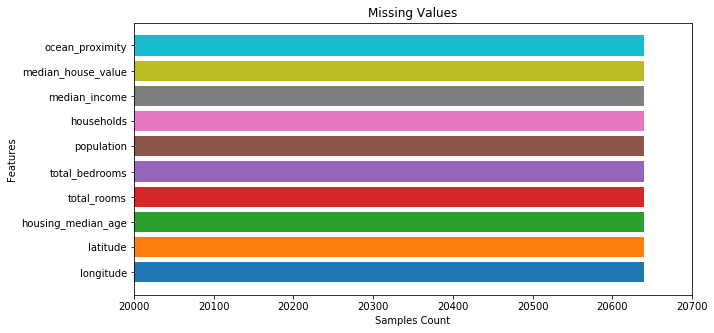

In [114]:
check_counts()

In [115]:
data.total_bedrooms=data.total_bedrooms.fillna(data.total_bedrooms.mean())

In [116]:
data.total_bedrooms.isnull().value_counts()

False    20640
Name: total_bedrooms, dtype: int64

False    20640
Name: longitude, dtype: int64
False    20640
Name: latitude, dtype: int64
False    20640
Name: housing_median_age, dtype: int64
False    20640
Name: total_rooms, dtype: int64
False    20640
Name: total_bedrooms, dtype: int64
False    20640
Name: population, dtype: int64
False    20640
Name: households, dtype: int64
False    20640
Name: median_income, dtype: int64
False    20640
Name: median_house_value, dtype: int64
False    20640
Name: ocean_proximity, dtype: int64


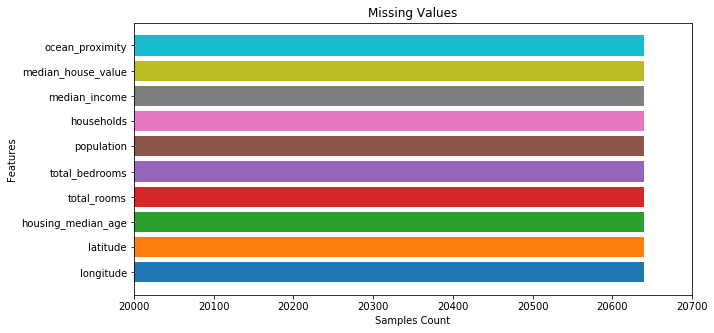

In [117]:
check_counts()

In [172]:
data.ocean_proximity.value_counts().in

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [175]:
color=[]
data.ocean_proximity
for d in data.ocean_proximity.values:
    if d=='<1H OCEAN':
        color.append(0)
    elif d=='INLAND':
        color.append(1)
    elif d=='NEAR OCEAN':
        color.append(2)
    elif d=='NEAR BAY':
        color.append(3)
    elif d=='ISLAND':
        color.append(4)

In [176]:
color

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [207]:
def area_dist():
    plt.figure(figsize=(10,10))
    plt.scatter(data.longitude.values,data.latitude.values,c=data.population,cmap='terrain', alpha=0.5)
    plt.show()

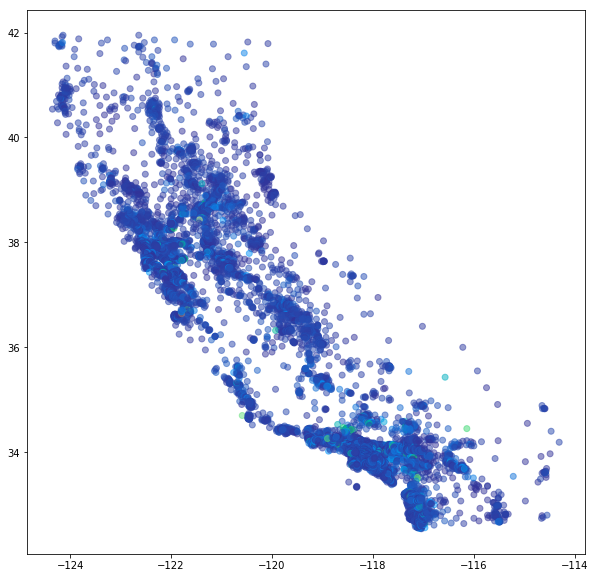

In [208]:
area_dist()